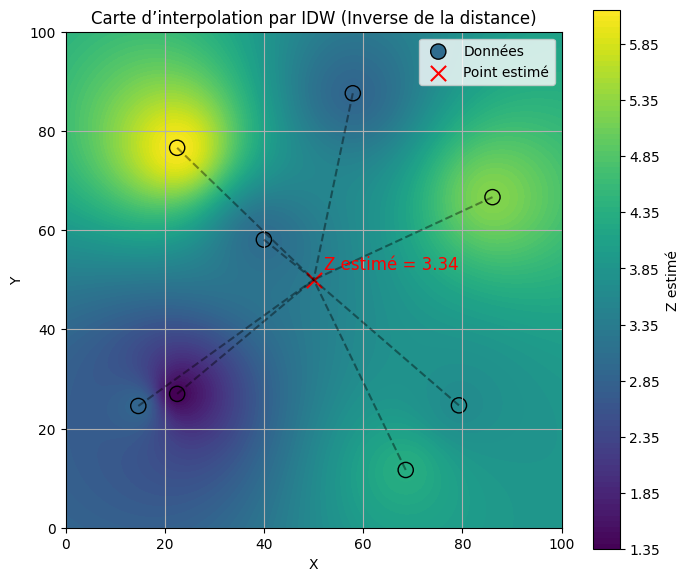

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# -----------------------------
# Données de base 2D
# -----------------------------
np.random.seed(42)
n_points = 8
x_samples = np.random.uniform(10, 90, n_points)
y_samples = np.random.uniform(10, 90, n_points)
z_samples = np.round(np.random.uniform(0, 10, n_points), 2)

points = np.vstack((x_samples, y_samples)).T

# -----------------------------
# Paramètres d'interpolation
# -----------------------------
power = 2.0
x0, y0 = 50, 50  # Point cible illustratif

# -----------------------------
# Carte IDW interpolée
# -----------------------------
res = 100  # Résolution fixe
grid_x, grid_y = np.meshgrid(np.linspace(0, 100, res), np.linspace(0, 100, res))
grid_z = np.zeros_like(grid_x)

for i in range(res):
    for j in range(res):
        gx, gy = grid_x[i, j], grid_y[i, j]
        dists = np.sqrt((x_samples - gx)**2 + (y_samples - gy)**2)
        with np.errstate(divide='ignore'):
            weights = 1 / dists**power
        weights[dists == 0] = 1e10
        weights /= np.sum(weights)
        grid_z[i, j] = np.sum(weights * z_samples)

# -----------------------------
# Estimation illustrée au point (x0, y0)
# -----------------------------
dists = np.sqrt((x_samples - x0)**2 + (y_samples - y0)**2)
with np.errstate(divide='ignore'):
    weights = 1 / dists**power
weights[dists == 0] = 1e10
weights /= np.sum(weights)
val_est = np.sum(weights * z_samples)

# -----------------------------
# Affichage final
# -----------------------------
fig, ax = plt.subplots(figsize=(8, 7))
c = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
sc = ax.scatter(x_samples, y_samples, c=z_samples, cmap='viridis', s=120, edgecolor='k', label="Données")

# Lien vers les données
for i in range(n_points):
    ax.plot([x_samples[i], x0], [y_samples[i], y0], 'k--', alpha=0.4)

# Point estimé
ax.scatter(x0, y0, marker='x', color='red', s=120, label='Point estimé')
ax.annotate(f"Z estimé = {val_est:.2f}", (x0+2, y0+2), fontsize=12, color='red')

# Autres options
plt.colorbar(c, label="Z estimé")
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.set_aspect('equal')
ax.set_title("Carte d’interpolation par IDW (Inverse de la distance)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.legend()
plt.grid(True)
plt.show()

